In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ASSIGHNMENT2_DATASET/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.describe


<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [ ]:
#check missing values and no missing values found
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


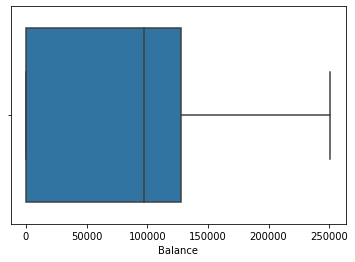

In [ ]:
#find Outliers
import seaborn as sns

sns.boxplot(data['Balance'])

In [ ]:
qnt=data.quantile(q=[0.25,0.75])
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [ ]:
IQR=qnt.loc[0.75]-qnt.loc[0.25]
IQR

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [ ]:
upper_extreme=qnt.loc[0.75]+1.5*IQR

lower_extreme=qnt.loc[0.25]-1.5*IQR

In [ ]:
upper_extreme

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
lower_extreme


RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [ ]:
#no outliers in balance
data[data['Balance']>319110.6]
data[data['Balance']<-191466.4]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['Age']>62]#outlier  above upper extreme

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [ ]:
#replacing outliers with mean value in Age

data['Age']=np.where(data['Age']>62,data['Age'].mean(),data['Age'])

In [ ]:
data[data['Age']>62]#outliers removed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['Age']<14]#no outliers below lower extreme

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['Tenure']>13]#no outliers in tenure
data[data['Tenure']<-3]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['CreditScore']>919]# no outliers above upper extreme

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['CreditScore']<383]#outliers found in CrediScore

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46.0,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28.0,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44.0,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54.0,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39.0,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52.0,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57.0,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30.0,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42.0,6,93608.28,1,1,0,168816.73,1


In [ ]:
# handling outliers in CreditsScore
data['CreditScore']=np.where(data['CreditScore']<383,data['CreditScore'].mean(),data['CreditScore'])

In [ ]:
data[data['CreditScore']<383]#outliers removed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data[data['EstimatedSalary']>296967.5]
data[data['EstimatedSalary']<-965771]#no outliers

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
#Encoding 
#one hot encoding
pd.get_dummies(data,columns=['Geography'])

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619.0,Female,42.0,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608.0,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502.0,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699.0,Female,39.0,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850.0,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,Male,39.0,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516.0,Male,35.0,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709.0,Female,36.0,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772.0,Male,42.0,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])#label encoding in Geography

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Gender']=le.fit_transform(data['Gender'])# label encoding in gender

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Splitting of data into dependent and independent variables
y = data['Exited']
x = data.iloc[:,0:12]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,1,15634602,Hargrave,619.0,0,0,42.0,2,0.00,1,1,1
1,2,15647311,Hill,608.0,2,0,41.0,1,83807.86,1,0,1
2,3,15619304,Onio,502.0,0,0,42.0,8,159660.80,3,1,0
3,4,15701354,Boni,699.0,0,0,39.0,1,0.00,2,0,0
4,5,15737888,Mitchell,850.0,2,0,43.0,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,0,1,39.0,5,0.00,2,1,0
9996,9997,15569892,Johnstone,516.0,0,1,35.0,10,57369.61,1,1,1
9997,9998,15584532,Liu,709.0,0,0,36.0,7,0.00,1,0,1
9998,9999,15682355,Sabbatini,772.0,1,1,42.0,3,75075.31,2,1,0


In [ ]:
# Splitting data inti training and test SET
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
4043,4044,15698294,Royster,635.0,2,1,31.0000,1,0.00,2,1,0
884,885,15777211,Herrera,515.0,0,1,38.9218,7,92113.61,1,1,1
84,85,15738751,Beit,493.0,0,0,46.0000,4,0.00,2,1,0
4665,4666,15656293,Davey,786.0,0,1,35.0000,3,0.00,2,1,0
2745,2746,15669957,Drake,655.0,1,1,52.0000,9,144696.75,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,4990,15602851,Ozioma,629.0,0,1,40.0000,9,0.00,1,1,0
2373,2374,15671789,Woods,616.0,0,1,31.0000,3,94263.91,2,1,0
1620,1621,15657386,Fiorentini,712.0,1,1,43.0000,1,141749.74,2,0,1
8832,8833,15765345,Wood,753.0,0,1,35.0000,4,0.00,2,1,1


In [ ]:
x_train.shape
x_test.shape

(2000, 12)

In [ ]:
y_train.shape
y_test.shape

(2000,)